In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from fairlearn.metrics import MetricFrame, selection_rate, equalized_odds_difference
import onnxruntime as rt

data = pd.read_csv('../data/300k_dataset.csv')

y = data['checked']

X = data.drop(['checked', 'Ja', 'Nee'], axis=1)
X = X.astype(np.float32)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_path = "../Group 9/model_1.onnx"
session = rt.InferenceSession(model_path)


y_pred_onnx = session.run(None, {'X': X_test.values.astype(np.float32)})[0]
y_pred_onnx = np.rint(y_pred_onnx).astype(int)

accuracy = accuracy_score(y_test, y_pred_onnx)
precision = precision_score(y_test, y_pred_onnx, average='binary')
recall = recall_score(y_test, y_pred_onnx, average='binary')
f1 = f1_score(y_test, y_pred_onnx, average='binary')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

X_test['persoon_geslacht_vrouw'] = data.loc[X_test.index, 'persoon_geslacht_vrouw']
X_test['persoon_leeftijd_bij_onderzoek'] = data.loc[X_test.index, 'persoon_leeftijd_bij_onderzoek']

sensitive_feature = 'persoon_geslacht_vrouw'

metric_frame = MetricFrame(
    metrics={'selection_rate': selection_rate, 'accuracy': accuracy_score},
    y_true=y_test,
    y_pred=y_pred_onnx,
    sensitive_features=X_test[sensitive_feature]
)

print("Fairness Metrics by Sensitive Feature:")
print(metric_frame.by_group)

equalized_odds = equalized_odds_difference(y_true=y_test, y_pred=y_pred_onnx, sensitive_features=X_test[sensitive_feature])
print(f"Equalized Odds Difference: {equalized_odds}")

X_test_noisy = X_test.copy()
noise = np.random.normal(0, 0.1, X_test_noisy.shape)
X_test_noisy += noise

y_pred_noisy = session.run(None, {'X': X_test_noisy.values.astype(np.float32)})[0]
y_pred_noisy = np.rint(y_pred_noisy).astype(int)

accuracy_noisy = accuracy_score(y_test, y_pred_noisy)
print(f"Accuracy with Noise: {accuracy_noisy}")



Accuracy: 0.8600333333333333
Precision: 0.8552941176470589
Recall: 0.08075983114863364
F1 Score: 0.14758424685343077
Fairness Metrics by Sensitive Feature:
                        selection_rate  accuracy
persoon_geslacht_vrouw                          
0                             0.015062  0.860188
1                             0.013210  0.859868
Equalized Odds Difference: 0.007253338077306992
Accuracy with Noise: 0.8600333333333333


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from fairlearn.metrics import MetricFrame, selection_rate, equalized_odds_difference
import onnxruntime as rt

data = pd.read_csv('../data/300k_dataset.csv')
y = data['checked']

X = data.drop(['checked', 'Ja', 'Nee'], axis=1)
X = X.astype(np.float32)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_path = "../Group 9/model_2.onnx"

session = rt.InferenceSession(model_path)

y_pred_onnx = session.run(None, {'X': X_test.values.astype(np.float32)})[0]

y_pred_onnx = np.rint(y_pred_onnx).astype(int)
accuracy = accuracy_score(y_test, y_pred_onnx)
precision = precision_score(y_test, y_pred_onnx, average='binary')
recall = recall_score(y_test, y_pred_onnx, average='binary')
f1 = f1_score(y_test, y_pred_onnx, average='binary')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

X_test['persoon_geslacht_vrouw'] = data.loc[X_test.index, 'persoon_geslacht_vrouw']
X_test['persoon_leeftijd_bij_onderzoek'] = data.loc[X_test.index, 'persoon_leeftijd_bij_onderzoek']

sensitive_feature = 'persoon_geslacht_vrouw'

metric_frame = MetricFrame(
    metrics={'selection_rate': selection_rate, 'accuracy': accuracy_score},
    y_true=y_test,
    y_pred=y_pred_onnx,
    sensitive_features=X_test[sensitive_feature]
)

print("Fairness Metrics by Sensitive Feature:")
print(metric_frame.by_group)

equalized_odds = equalized_odds_difference(y_true=y_test, y_pred=y_pred_onnx, sensitive_features=X_test[sensitive_feature])
print(f"Equalized Odds Difference: {equalized_odds}")

X_test_noisy = X_test.copy()
noise = np.random.normal(0, 0.1, X_test_noisy.shape)
X_test_noisy += noise

y_pred_noisy = session.run(None, {'X': X_test_noisy.values.astype(np.float32)})[0]
y_pred_noisy = np.rint(y_pred_noisy).astype(int)
accuracy_noisy = accuracy_score(y_test, y_pred_noisy)
print(f"Accuracy with Noise: {accuracy_noisy}")



Accuracy: 0.8236333333333333
Precision: 0.40134865134865133
Recall: 0.3570317707176183
F1 Score: 0.3778953556731334
Fairness Metrics by Sensitive Feature:
                        selection_rate  accuracy
persoon_geslacht_vrouw                          
0                             0.103077  0.839386
1                             0.165965  0.806788
Equalized Odds Difference: 0.10094088811140434
Accuracy with Noise: 0.8232833333333334


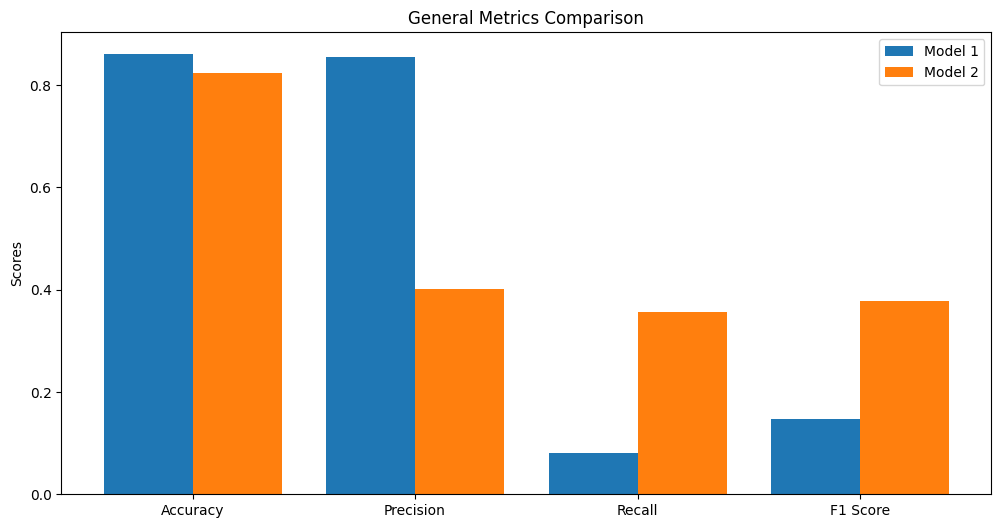

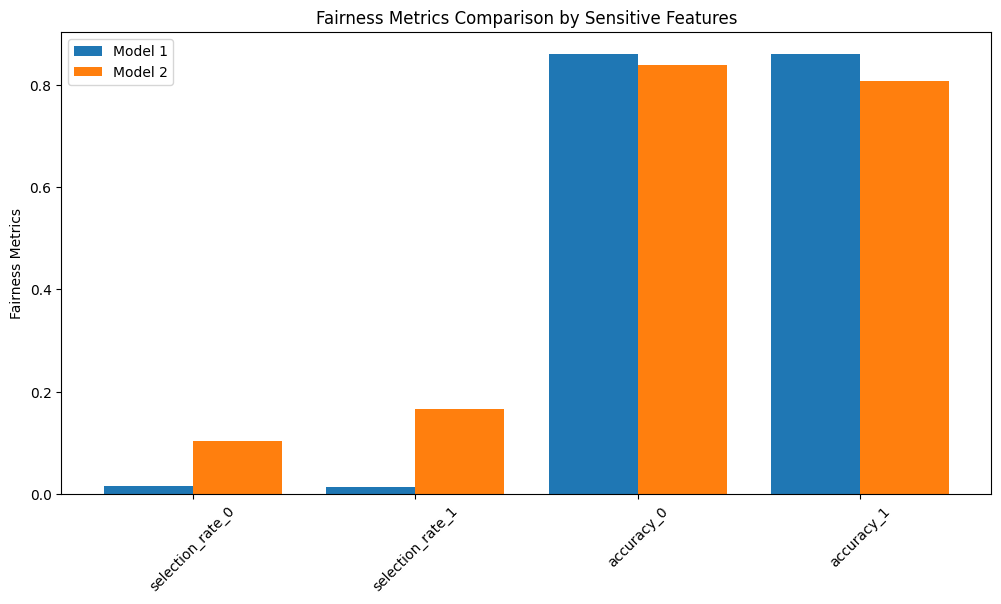

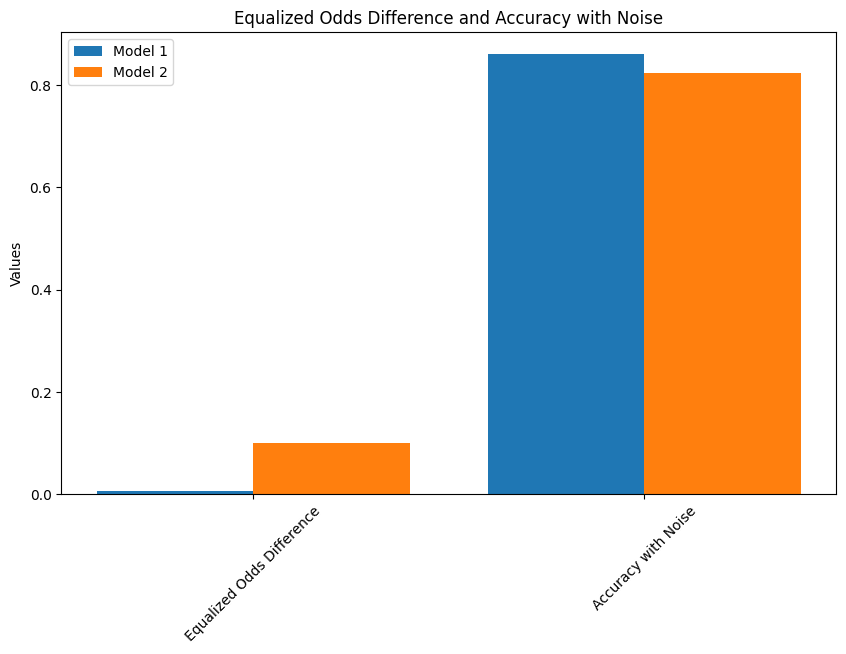

In [4]:
import matplotlib.pyplot as plt
import numpy as np

metrics_model_1 = {
    "Accuracy": 0.8600333333333333,
    "Precision": 0.8552941176470589,
    "Recall": 0.08075983114863364,
    "F1 Score": 0.14758424685343077,
    "Fairness Metrics": {"selection_rate_0": 0.015062, "selection_rate_1": 0.013210, "accuracy_0": 0.860188, "accuracy_1": 0.859868},
    "Equalized Odds Difference": 0.007253338077306992,
    "Accuracy with Noise": 0.8600333333333333
}

metrics_model_2 = {
    "Accuracy": 0.8236333333333333,
    "Precision": 0.40134865134865133,
    "Recall": 0.3570317707176183,
    "F1 Score": 0.3778953556731334,
    "Fairness Metrics": {"selection_rate_0": 0.103077, "selection_rate_1": 0.165965, "accuracy_0": 0.839386, "accuracy_1": 0.806788},
    "Equalized Odds Difference": 0.10094088811140434,
    "Accuracy with Noise": 0.8232833333333334
}

general_metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
values_model_1 = [metrics_model_1[metric] for metric in general_metrics]
values_model_2 = [metrics_model_2[metric] for metric in general_metrics]

x = np.arange(len(general_metrics))

plt.figure(figsize=(12, 6))
plt.bar(x - 0.2, values_model_1, width=0.4, label="Model 1")
plt.bar(x + 0.2, values_model_2, width=0.4, label="Model 2")
plt.xticks(x, general_metrics)
plt.ylabel("Scores")
plt.title("General Metrics Comparison")
plt.legend()
plt.show()

fairness_metrics = ["selection_rate_0", "selection_rate_1", "accuracy_0", "accuracy_1"]
fairness_values_model_1 = [metrics_model_1["Fairness Metrics"][metric] for metric in fairness_metrics]
fairness_values_model_2 = [metrics_model_2["Fairness Metrics"][metric] for metric in fairness_metrics]

x = np.arange(len(fairness_metrics))

plt.figure(figsize=(12, 6))
plt.bar(x - 0.2, fairness_values_model_1, width=0.4, label="Model 1")
plt.bar(x + 0.2, fairness_values_model_2, width=0.4, label="Model 2")
plt.xticks(x, fairness_metrics, rotation=45)
plt.ylabel("Fairness Metrics")
plt.title("Fairness Metrics Comparison by Sensitive Features")
plt.legend()
plt.show()

specific_metrics = ["Equalized Odds Difference", "Accuracy with Noise"]
specific_values_model_1 = [metrics_model_1["Equalized Odds Difference"], metrics_model_1["Accuracy with Noise"]]
specific_values_model_2 = [metrics_model_2["Equalized Odds Difference"], metrics_model_2["Accuracy with Noise"]]

x = np.arange(len(specific_metrics))

plt.figure(figsize=(10, 6))
plt.bar(x - 0.2, specific_values_model_1, width=0.4, label="Model 1")
plt.bar(x + 0.2, specific_values_model_2, width=0.4, label="Model 2")
plt.xticks(x, specific_metrics, rotation=45)
plt.ylabel("Values")
plt.title("Equalized Odds Difference and Accuracy with Noise")
plt.legend()
plt.show()


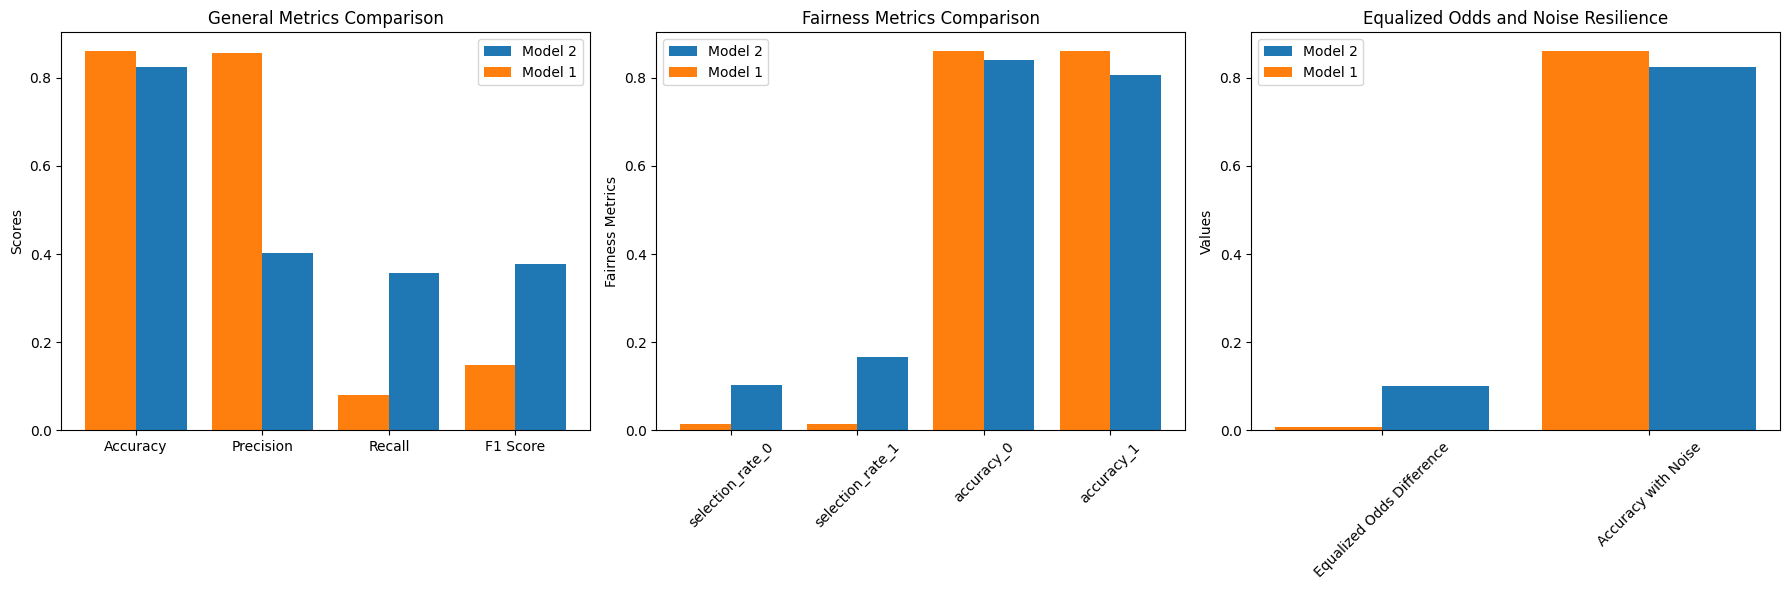

In [9]:

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

x_general = np.arange(len(general_metrics))
axes[0].bar(x_general + 0.2, values_model_2, width=0.4, label="Model 2")
axes[0].bar(x_general - 0.2, values_model_1, width=0.4, label="Model 1")

axes[0].set_xticks(x_general)
axes[0].set_xticklabels(general_metrics)
axes[0].set_ylabel("Scores")
axes[0].set_title("General Metrics Comparison")
axes[0].legend()

x_fairness = np.arange(len(fairness_metrics))
axes[1].bar(x_fairness + 0.2, fairness_values_model_2, width=0.4, label="Model 2")
axes[1].bar(x_fairness - 0.2, fairness_values_model_1, width=0.4, label="Model 1")

axes[1].set_xticks(x_fairness)
axes[1].set_xticklabels(fairness_metrics, rotation=45)
axes[1].set_ylabel("Fairness Metrics")
axes[1].set_title("Fairness Metrics Comparison")
axes[1].legend()

x_specific = np.arange(len(specific_metrics))
axes[2].bar(x_specific + 0.2, specific_values_model_2, width=0.4,  label="Model 2")
axes[2].bar(x_specific - 0.2, specific_values_model_1, width=0.4,  label="Model 1")
axes[2].set_xticks(x_specific)
axes[2].set_xticklabels(specific_metrics, rotation=45)
axes[2].set_ylabel("Values")
axes[2].set_title("Equalized Odds and Noise Resilience")
axes[2].legend()

plt.tight_layout()
plt.show()
